# Break even analysis

## Revenues

1. Acording to this [NSI 2021 Census analysis](https://www.nsi.bg/sites/default/files/files/pressreleases/Census2021-ethnos.pdf) the roma minority group in Bulgaria is 266 720, from which 14 % have secondary education and 41 % have primary education, respectively **37 341** and **109 355**.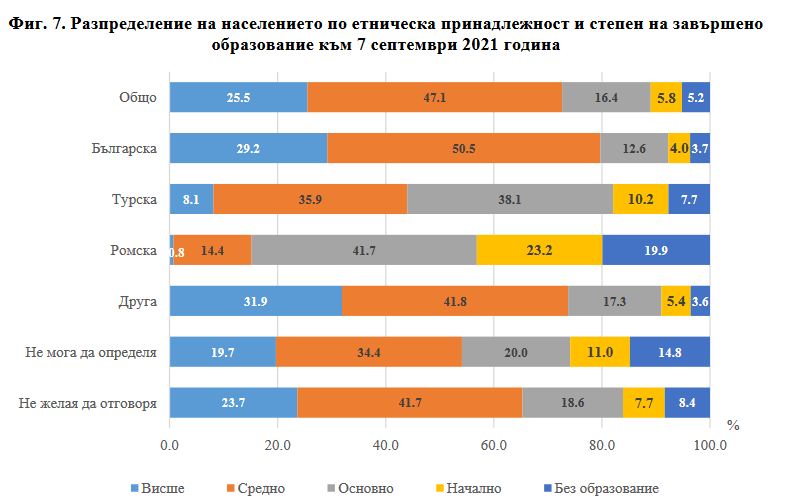

2. Acording to this [site for qualifications](https://zbut-academy.bg/obuchenie/kurs-zavarchik/) the trainees must obay the *Regulation for Conditions and Procedure for acquisition and recognition of welding competence*, which states that they must have passed **6-th** grade (**secondary edication**) and be **16 years old** or successfully completed a literacy course under the Employment Promotion Act (EPA). This site also gives us information of a course price: **600 leva**.
    
        -> The 90 % confidence interval for number of potential trainees becomes: [0, 140000]

3. This is too broad, we need to see how much market demand there is. In the most popular [bulgarian site for job searching](https://www.jobs.bg/front_job_search.php?subm=1&keywords%5B%5D=%D0%B7%D0%B0%D0%B2%D0%B0%D1%80%D1%87%D0%B8%D0%BA) there are **100 job offerings!**. Looking at the [National Employment Agency](https://www.az.government.bg/bg/ejobs/prl_list/) we see similar job listnings, we conclude that the interval becomes:

        -> The 90 % confidence interval for number of potential trainees becomes: [0, 100]

4. Let's look at pricing this course. From point 1. the price was **600 leva**. [Another site](https://www.davitoz.org/kursove-za-zavarchik/) gives us a price of 956 leva (if you pay the lump sum) or **1056 leva** (that can be split in two payments of 528) for individual training course and for a group training the price is, of course lower. The minimum price we could find is 300 leva, which seems too low, however we will use it as a lower boundary.

        -> The 90 % confidence interval for number of potential course price: [300, 1056]

5. Let's give some success rate intervals for students to finish our course. Acording to ["Massive open online course completion rates revisited: Assessment, length and attrition", by Katy Jordan](https://www.researchgate.net/publication/308391574_Massive_open_online_course_completion_rates_revisited_Assessment_length_and_attrition), we will use those results:

*"Completion rates (defined as the percentage of enrolled students who completed the course) vary from 0.7% to 52.1%, with a median value of 12.6%."*

        -> The 90 % confidence interval for number of potencial course price: [0.007, 0.52]

## Costs

1. We need to obtay [The licensing requirements for a professional training center have been adopted by the Management Board of the National Agency for Professional Education and Training (NAPOO) with Protocol No. 09 dated July 16, 2008, amended and supplemented by Protocol No. 02 dated May 19, 2021](https://www.navet.government.bg/bg/media/iziskvania-l-cpo-002.pdf), thus we need:
 - Material and technical base
 - Human resources - teaching staff and administration capacity
 - Access and availability of information for all parties involved
 - etc. 

2. In order to asses some cost we will use the Profit and Loss Statement(P&L) from one of the qualification firms we mentioned earlier, called ["Izoblock" LLC](https://zbut-academy.bg/obuchenie/kurs-zavarchik/), which is publicly available in the bulgarian [Commercial Register](https://portal.registryagency.bg/CR/Reports/ActiveConditionTabResult?uic=123745189). Their total equity and liabilities are around **100 000 leva**, however they are a much bigger firm that offers many different courses, so our lower boundry would be half that

        -> The 90 % confidence interval for total equity and liability: [50000, 100000]

## Monte Carlo simulation - Year 1

### Summary for year 1:
    - On average around 40 000 leva external financing will be needed to break even.
    - There is a chance that in one out of ten scenarios to be break even.
    - On average we created about 13 high in demand and well payed workers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
np.random.seed(13)
num_scenarios = 10000

In [4]:
data = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(0, 100, size=num_scenarios),
                     'course_price': np.random.uniform(300, 1056, size=num_scenarios),
                     'course_completion': np.random.uniform(0.007, 0.52, size=num_scenarios),
                        'totalCosts': np.random.uniform(50000, 100000, size=num_scenarios)})

In [5]:
# Creating a revenue column by multipling course price and trainees
data['total_revenue'] = data['trainees'] * data['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
data['NetIncome'] = data['total_revenue'] - data['totalCosts']
# Creating a column that shows how much new workforce we have created
data['Workforce'] = data['trainees'] * data['course_completion']
# Creating a column that counts if net income is above 0, break even point
data['Yes/No'] = np.where(data['NetIncome'] >= 0, 'Yes', 'No')

In [6]:
print(data)

      scenario   trainees  course_price  course_completion    totalCosts  \
0            1  77.770241    535.815481           0.190651  59056.403920   
1            2  23.754122    570.180636           0.133342  85167.978603   
2            3  82.427853    389.961141           0.420198  85534.805682   
3            4  96.574920    469.833324           0.190086  80627.367724   
4            5  97.260111    454.935607           0.178124  77058.802179   
...        ...        ...           ...                ...           ...   
9995      9996  79.667220    974.041151           0.079007  50721.968118   
9996      9997  57.350330    342.148839           0.053958  69518.134671   
9997      9998  13.252624    889.397626           0.114160  80077.287040   
9998      9999  79.817773    996.707784           0.067250  72773.393399   
9999     10000  29.906977    581.531006           0.393236  50646.529959   

      total_revenue     NetIncome  Workforce Yes/No  
0      41670.499104 -17385.904816

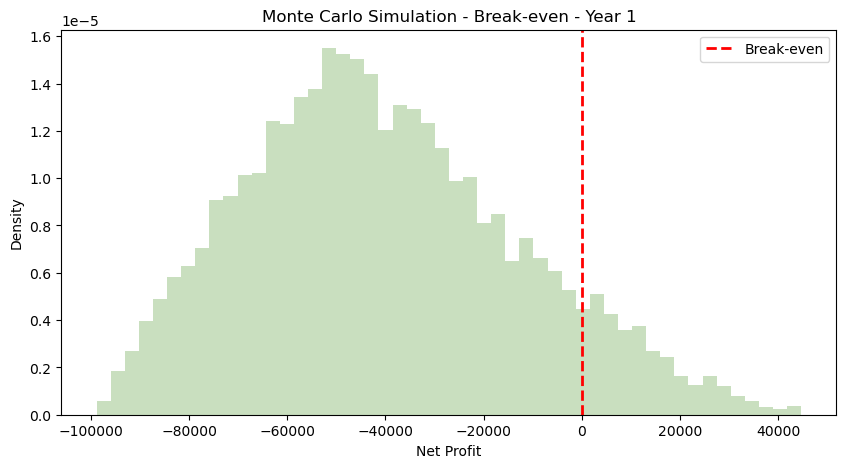

In [29]:
plt.figure(figsize=(10, 5))
plt.hist(data['NetIncome'], bins=50, density=True, color='#B2D2A4', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even - Year 1')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
result_table = pd.crosstab(index=data['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       9067
Yes       933


In [67]:
column_summary = pd.DataFrame(data['Workforce'].describe())
column_summary_NI = pd.DataFrame(data['NetIncome'].describe())
column_summary_CC = pd.DataFrame(data['course_completion'].describe())

year_01_summary = pd.concat([column_summary, column_summary_NI, column_summary_CC])
year_01_summary = year_01_summary

print(year_01_summary)

          Workforce     NetIncome  course_completion
count  10000.000000           NaN                NaN
mean      13.266423           NaN                NaN
std       11.445051           NaN                NaN
min        0.000068           NaN                NaN
25%        3.732302           NaN                NaN
50%       10.038915           NaN                NaN
75%       20.213423           NaN                NaN
max       51.200983           NaN                NaN
count           NaN  10000.000000                NaN
mean            NaN -40576.127979                NaN
std             NaN  27681.628043                NaN
min             NaN -98835.511021                NaN
25%             NaN -60807.955772                NaN
50%             NaN -43331.841360                NaN
75%             NaN -22671.760818                NaN
max             NaN  44695.745902                NaN
count           NaN           NaN       10000.000000
mean            NaN           NaN           0.

## Monte Carlo simulation - Year 2

1. After year one and successful marketing campain we expect our student count to increase. Our reasons are as follows:
    - There is a severe shortage of manual workers
    - They are crucial for the whole economy
    - They are very well paid!
    - They are AI free, for now!

2. Based on point 1 information, we will construct a new interval for the students. To make a good enough prediction we will use the standard deviation of the people, who completed our course, which is 11. Then we will add it to the previous invervals' lower and upper boundary. It will look as follows:

        -> The 90 % confidence interval for number of potential trainees becomes: [13, 113]

3. To look more professional we should also update our course price, as we made a big interval at the beginning. How should we update it? We will set our lower boundary to 500 and for bigger groups we will make a discount.

        -> The 90 % confidence interval for number of potential course price: [500, 1056] 

4. After the first year, we took some measures to increase our course completion. From the first year we saw that on average 26 % of enrolled students completed our course, evey year we will try to increase it by 10%:

        The 90 % confidence interval for number of potencial course price: [26%, 36%] 

### Summary for year 2:
    - This year around 26 000 leva are needed to be provided externally, which is an improvement of 14 000 leva!
    - The chances to break even have doubled! Now in every 2 out of 10 scenarios we will break even!
    - We created 20 more well payed workers!

In [68]:
year_02 = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(13, 113, size=num_scenarios),
                     'course_price': np.random.uniform(500, 1056, size=num_scenarios),
                     'course_completion': np.random.uniform(0.26, 0.36, size=num_scenarios),
                        'totalCosts': np.random.uniform(50000, 100000, size=num_scenarios)})

In [69]:
# Creating a revenue column by multipling course price and trainees
year_02['total_revenue'] = year_02['trainees'] * year_02['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
year_02['NetIncome'] = year_02['total_revenue'] - year_02['totalCosts']
# Creating a column that shows how much new workforce we have created
year_02['Workforce'] = year_02['trainees'] * year_02['course_completion']
# Creating a column that counts if net income is above 0, break even point
year_02['Yes/No'] = np.where(year_02['NetIncome'] >= 0, 'Yes', 'No')

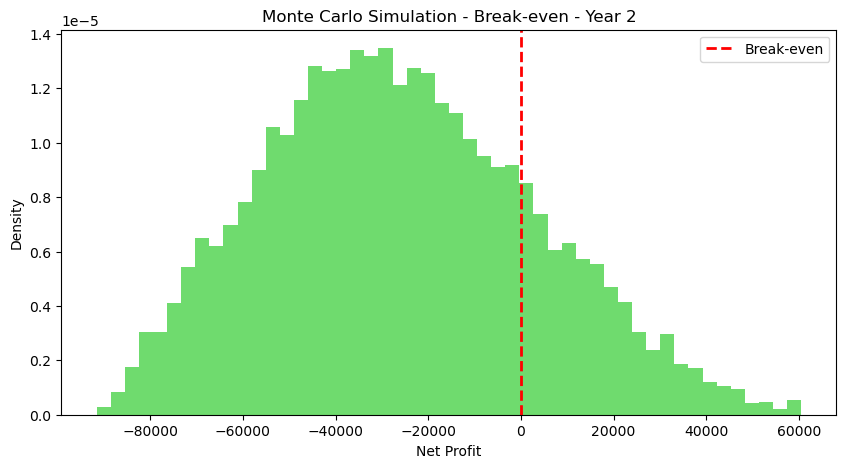

In [70]:
plt.figure(figsize=(10, 5))
plt.hist(year_02['NetIncome'], bins=50, density=True, color='#32CD30', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even - Year 2')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [71]:
result_table = pd.crosstab(index=year_02['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       8044
Yes      1956


In [72]:
column_summary = year_02['Workforce'].describe()
print(column_summary)

count    10000.000000
mean        19.571780
std          9.145313
min          3.385027
25%         11.682819
50%         19.469357
75%         27.044625
max         40.497355
Name: Workforce, dtype: float64


In [73]:
column_summary = year_02['NetIncome'].describe()
print(column_summary)

count    10000.000000
mean    -26074.424279
std      29010.301716
min     -91585.225676
25%     -47417.576957
50%     -27982.312423
75%      -6000.304288
max      60488.150702
Name: NetIncome, dtype: float64


In [74]:
column_summary = year_02['course_completion'].describe()
print(column_summary)

count    10000.000000
mean         0.309992
std          0.028731
min          0.260007
25%          0.285458
50%          0.309703
75%          0.334560
max          0.359992
Name: course_completion, dtype: float64


## Monte Carlo simulation - Year 3

1. So far we have fully train 36 students over the two years. We begin to develop a good name, so on and so on. We will once again update our indicators, following the year 2 schema:

        -> The 90 % confidence interval for number of potential trainees becomes: [36, 136]
        -> The 90 % confidence interval for number of potencial course price: [30%, 40%]

2. Prices should remain stable, but our costs should increase. Reasons for cost increases are a lot, but mainly due to our increase in scope and size:

        -> The 90 % confidence interval for total equity and liability: [60000, 110000]

### Summary in year 3


    - Our losses are expected to be around 15 000 leva, big improvement compared to year 1!
    - Now in every 3 out of 10 scenarios we will break even!
    - We created 30 highly demanded workers just this year!

In [75]:
year_03 = pd.DataFrame({'scenario': np.arange(1, num_scenarios + 1),
                     'trainees': np.random.uniform(36, 136, size=num_scenarios),
                     'course_price': np.random.uniform(500, 1056, size=num_scenarios),
                     'course_completion': np.random.uniform(0.30, 0.40, size=num_scenarios),
                        'totalCosts': np.random.uniform(60000, 110000, size=num_scenarios)})

In [76]:
# Creating a revenue column by multipling course price and trainees
year_03['total_revenue'] = year_03['trainees'] * year_03['course_price']
# Creating a column that calculates Net income by subtracting revenue and cost
year_03['NetIncome'] = year_03['total_revenue'] - year_03['totalCosts']
# Creating a column that shows how much new workforce we have created
year_03['Workforce'] = year_03['trainees'] * year_03['course_completion']
# Creating a column that counts if net income is above 0, break even point
year_03['Yes/No'] = np.where(year_03['NetIncome'] >= 0, 'Yes', 'No')

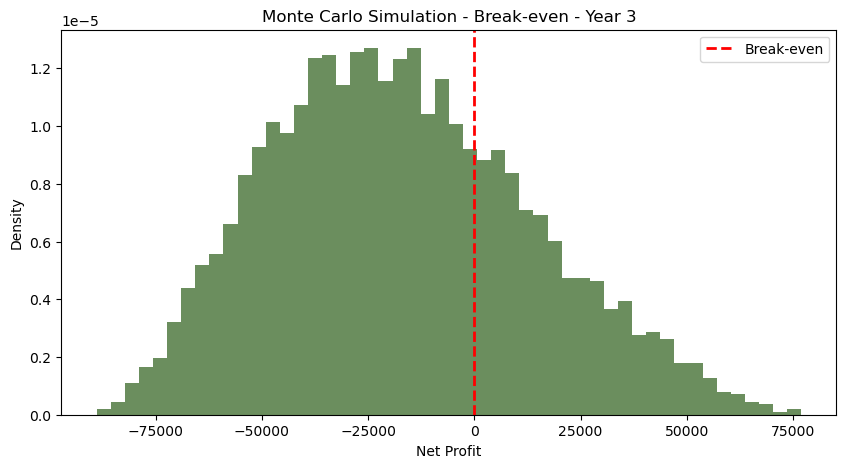

In [82]:
plt.figure(figsize=(10, 5))
plt.hist(year_03['NetIncome'], bins=50, density=True, color='#2C5E1A', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Break-even')
plt.title('Monte Carlo Simulation - Break-even - Year 3')
plt.xlabel('Net Profit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [78]:
column_summary = year_03.describe()
print(column_summary)

          scenario      trainees  course_price  course_completion  \
count  10000.00000  10000.000000  10000.000000       10000.000000   
mean    5000.50000     86.536800    779.905091           0.350417   
std     2886.89568     28.797941    160.505732           0.028678   
min        1.00000     36.006113    500.143345           0.300002   
25%     2500.75000     61.729502    640.179389           0.325526   
50%     5000.50000     86.499699    783.468637           0.350363   
75%     7500.25000    111.629198    919.057250           0.375260   
max    10000.00000    135.995994   1055.943894           0.399997   

          totalCosts  total_revenue     NetIncome     Workforce  
count   10000.000000   10000.000000  10000.000000  10000.000000  
mean    84791.168084   67525.914206 -17265.253878     30.327025  
std     14458.935719   26901.323611  30707.496376     10.431666  
min     60000.019438   18542.755027 -88847.858526     11.000576  
25%     72299.964126   46053.337087 -40135.59140

In [80]:
result_table = pd.crosstab(index=year_03['Yes/No'], columns='count')
print(result_table)

col_0   count
Yes/No       
No       7170
Yes      2830
